In [68]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch as th
from tqdm import tqdm


processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50").to("cuda").eval()


/home/cemmi/anaconda3/envs/aicrowd-product/lib/python3.8/site-packages/transformers/models/detr/image_processing_detr.py:776: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [69]:
gallery_csv_path = '/home/cemmi/Documents/aicrowd/development_test_data/gallery.csv'
dataset_path = '/home/cemmi/Documents/aicrowd/development_test_data'

In [70]:

gallery_paths = pd.read_csv(gallery_csv_path)["img_path"].tolist()
curated_paths = {}
for gpath in tqdm(gallery_paths):
    path_ = os.path.join(dataset_path, gpath)
    image = cv2.imread(path_)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    inputs = processor(images=image, return_tensors="pt").to("cuda")

    outputs = model(**inputs)

    target_sizes = th.tensor([[image.shape[0], image.shape[1]]]).to("cuda")
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.3)[0]
    boxes = results["boxes"]
    if len(boxes) == 0:
        curated_paths[path_] = None
        continue

    prods = th.prod(boxes[:,2:4] - boxes[:,0:2], 1)
    best_index = th.argmax(prods)
    box = boxes[best_index].cpu().detach().numpy().astype(int)
    curated_paths[path_] = box

    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1067/1067 [01:02<00:00, 17.04it/s]


In [75]:
for gpath in tqdm(gallery_paths):
    path_ = os.path.join(dataset_path, gpath)
    image = cv2.imread(path_)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    loc = curated_paths[path_]
    if loc is None:
        continue
    img_ = image[loc[1]:loc[3], loc[0]:loc[2]]

    print(loc, image.shape, img_.shape)


  4%|█████                                                                                                                    | 45/1067 [00:00<00:04, 226.50it/s]

[ 46   0 715 864] (1000, 750, 3) (864, 669, 3)
[139 133 871 858] (1000, 1000, 3) (725, 732, 3)
[ 27   6 698 384] (400, 700, 3) (378, 671, 3)
[ 46  83 870 917] (1000, 919, 3) (834, 824, 3)
[ 14  20 881 429] (442, 900, 3) (409, 867, 3)
[ 174  164 1097  550] (720, 1280, 3) (386, 923, 3)
[ 64 548 678 890] (1000, 750, 3) (342, 614, 3)
[ 72 657 689 918] (953, 762, 3) (261, 617, 3)
[  0   2 712 948] (1000, 800, 3) (946, 712, 3)
[ 27 465 657 899] (1000, 693, 3) (434, 630, 3)
[ 76 350 927 672] (1000, 1000, 3) (322, 851, 3)
[ 26  91 684 796] (800, 800, 3) (705, 658, 3)
[ 60 389 653 712] (1000, 667, 3) (323, 593, 3)
[ 84 259 712 772] (1000, 800, 3) (513, 628, 3)
[ 26  21 884 434] (450, 900, 3) (413, 858, 3)
[103  33 898 829] (866, 1000, 3) (796, 795, 3)
[  0  63 997 990] (1000, 1000, 3) (927, 997, 3)
[ 53   2 546 586] (614, 616, 3) (584, 493, 3)
[  1   2 698 250] (256, 700, 3) (248, 697, 3)
[142   1 692 709] (799, 800, 3) (708, 550, 3)
[  0  26 749 993] (1000, 750, 3) (967, 749, 3)
[  4   2 696 3

  9%|███████████▏                                                                                                             | 99/1067 [00:00<00:03, 252.90it/s]

[ 29 312 713 690] (1000, 750, 3) (378, 684, 3)
[ 24 433 665 896] (1000, 693, 3) (463, 641, 3)
[  1   1 995 341] (347, 1000, 3) (340, 994, 3)
[136  24 854 972] (1000, 1000, 3) (948, 718, 3)
[ 54  59 741 737] (800, 800, 3) (678, 687, 3)
[396 127 700 961] (1000, 750, 3) (834, 304, 3)
[  0   4 698 387] (416, 700, 3) (383, 698, 3)
[ 31 159 658 527] (700, 700, 3) (368, 627, 3)
[  0   0 628 944] (1000, 800, 3) (944, 628, 3)
[ 23 340 725 800] (1000, 750, 3) (460, 702, 3)
[  1  48 641 790] (800, 800, 3) (742, 640, 3)
[101  72 658 905] (1000, 800, 3) (833, 557, 3)
[ 44 188 532 992] (1000, 750, 3) (804, 488, 3)
[  8   1 334 981] (1000, 343, 3) (980, 326, 3)
[  0 303 999 995] (1000, 1000, 3) (692, 999, 3)
[  7   2 692 532] (555, 700, 3) (530, 685, 3)
[ 22 216 725 728] (1000, 750, 3) (512, 703, 3)
[ 16  12 983 975] (1000, 1000, 3) (963, 967, 3)
[ 57 154 714 922] (1000, 750, 3) (768, 657, 3)
[  0   0 749 999] (1000, 750, 3) (999, 749, 3)
[ 28  32 933 431] (487, 1000, 3) (399, 905, 3)
[305   0 576  6

 12%|██████████████                                                                                                          | 125/1067 [00:00<00:03, 246.22it/s]

[ 95 524 594 795] (1000, 750, 3) (271, 499, 3)
[  1   1 531 524] (800, 800, 3) (523, 530, 3)
[ 16  17 883 368] (416, 900, 3) (351, 867, 3)
[  0   2 665 986] (1000, 667, 3) (984, 665, 3)
[ 16  68 775 760] (810, 790, 3) (692, 759, 3)
[ 26 122 774 869] (1000, 800, 3) (747, 748, 3)
[192 613 733 914] (1000, 750, 3) (301, 541, 3)
[ 47 455 877 849] (933, 933, 3) (394, 830, 3)
[ 14 350 735 649] (1000, 750, 3) (299, 721, 3)
[  8 356 740 649] (1000, 750, 3) (293, 732, 3)
[ 24  78 997 988] (1000, 1000, 3) (910, 973, 3)
[ 63 407 625 898] (1000, 693, 3) (491, 562, 3)
[ 16 588 742 994] (1000, 751, 3) (406, 726, 3)
[ 31 479 715 997] (1000, 750, 3) (518, 684, 3)
[167 167 842 834] (1000, 1000, 3) (667, 675, 3)
[ 50 305 730 717] (1000, 750, 3) (412, 680, 3)
[121 362 896 642] (1000, 1000, 3) (280, 775, 3)
[ 38  61 749 993] (1000, 750, 3) (932, 711, 3)
[ 58 176 713 838] (1000, 750, 3) (662, 655, 3)
[  3   3 698 596] (629, 700, 3) (593, 695, 3)
[ 11  89 817 910] (1000, 832, 3) (821, 806, 3)
[ 80 392 927 62

 17%|████████████████████                                                                                                    | 178/1067 [00:00<00:03, 255.67it/s]

[ 51  85 758 705] (800, 800, 3) (620, 707, 3)
[  4   3 695 352] (359, 700, 3) (349, 691, 3)
[ 26  24 874 624] (652, 900, 3) (600, 848, 3)
[261  34 743 968] (1000, 1000, 3) (934, 482, 3)
[ 23   0 287 575] (640, 360, 3) (575, 264, 3)
[ 18  24 976 905] (1000, 1000, 3) (881, 958, 3)
[ 55  14 949 307] (359, 1000, 3) (293, 894, 3)
[ 16 362 653 720] (1000, 667, 3) (358, 637, 3)
[  6 106 998 460] (563, 1000, 3) (354, 992, 3)
[  7   0 693 541] (556, 700, 3) (541, 686, 3)
[ 37 384 714 727] (1000, 750, 3) (343, 677, 3)
[ 15 302 786 533] (800, 800, 3) (231, 771, 3)
[170   0 532 928] (1000, 667, 3) (928, 362, 3)
[  2 703 746 992] (1000, 750, 3) (289, 744, 3)
[116  57 743 601] (667, 1000, 3) (544, 627, 3)
[ 33 251 761 720] (1000, 800, 3) (469, 728, 3)
[  1   5 991 350] (356, 1000, 3) (345, 990, 3)
[  3   1 684 597] (638, 700, 3) (596, 681, 3)
[  3   3 693 992] (1000, 800, 3) (989, 690, 3)
[  4   1 697 429] (437, 700, 3) (428, 693, 3)
[  0 371 721 928] (1000, 750, 3) (557, 721, 3)
[ 41 191 453 404] (

 22%|██████████████████████████▏                                                                                             | 233/1067 [00:00<00:03, 249.48it/s]

[ 21 116 749 619] (800, 800, 3) (503, 728, 3)
[  5 288 973 851] (1000, 1000, 3) (563, 968, 3)
[116 150 973 450] (665, 1000, 3) (300, 857, 3)
[238  74 495 899] (1000, 750, 3) (825, 257, 3)
[  0   0 701 924] (1000, 800, 3) (924, 701, 3)
[384   0 882 934] (1000, 1000, 3) (934, 498, 3)
[ 36 365 711 670] (1000, 750, 3) (305, 675, 3)
[133 134 871 795] (1000, 1000, 3) (661, 738, 3)
[  0   2 998 988] (1000, 1000, 3) (986, 998, 3)
[536 325 880 666] (720, 1280, 3) (341, 344, 3)
[  9 206 740 477] (586, 750, 3) (271, 731, 3)
[  0   4 998 991] (1000, 1000, 3) (987, 998, 3)
[ 16   9 986 986] (1000, 1000, 3) (977, 970, 3)
[ 29  42 864 356] (413, 900, 3) (314, 835, 3)
[  9 616 742 965] (1000, 750, 3) (349, 733, 3)
[ 73  82 711 991] (1000, 750, 3) (909, 638, 3)
[ 27   2 698 419] (433, 700, 3) (417, 671, 3)
[149 253 874 542] (733, 1000, 3) (289, 725, 3)
[ 24 174 728 835] (1000, 750, 3) (661, 704, 3)
[ 57  60 940 940] (1000, 1000, 3) (880, 883, 3)
[112 318 889 662] (1000, 1000, 3) (344, 777, 3)
[ 19  12 

 27%|████████████████████████████████                                                                                        | 285/1067 [00:01<00:03, 247.93it/s]

[ 50 612 697 898] (1000, 750, 3) (286, 647, 3)
[ 75 337 952 673] (1000, 1000, 3) (336, 877, 3)
[168 184 659 632] (1000, 750, 3) (448, 491, 3)
[ 71   0 709 932] (1000, 750, 3) (932, 638, 3)
[ 51 200 643 481] (693, 700, 3) (281, 592, 3)
[   0    0  998 1000] (1000, 999, 3) (1000, 998, 3)
[119  62 374 929] (1000, 750, 3) (867, 255, 3)
[ 38 168 700 832] (1000, 750, 3) (664, 662, 3)
[129 168 661 693] (800, 800, 3) (525, 532, 3)
[  0   3 999 983] (993, 1000, 3) (980, 999, 3)
[ 18   6 429 966] (1000, 443, 3) (960, 411, 3)
[ 14   2 683 231] (250, 700, 3) (229, 669, 3)
[195 478 541 855] (1000, 750, 3) (377, 346, 3)
[ 20 370 685 678] (700, 700, 3) (308, 665, 3)
[ 28 306 989 698] (999, 1000, 3) (392, 961, 3)
[ 19   1 697 343] (361, 700, 3) (342, 678, 3)
[ 22 337 723 804] (1000, 750, 3) (467, 701, 3)
[  0 157 357 638] (640, 358, 3) (481, 357, 3)
[ 16   4 695 456] (475, 700, 3) (452, 679, 3)
[  0 295 999 706] (875, 1000, 3) (411, 999, 3)
[ 11  88 819 906] (1000, 832, 3) (818, 808, 3)
[ 10  10 981 9

 32%|█████████████████████████████████████▉                                                                                  | 337/1067 [00:01<00:02, 251.12it/s]

[ 21 359 613 678] (1000, 667, 3) (319, 592, 3)
[230  76 456 903] (1000, 693, 3) (827, 226, 3)
[ 30  23 968 965] (1000, 1000, 3) (942, 938, 3)
[211  66 849 603] (667, 1000, 3) (537, 638, 3)
[  0   1 697 329] (356, 700, 3) (328, 697, 3)
[106  91 748 724] (816, 790, 3) (633, 642, 3)
[362 464 659 596] (1000, 750, 3) (132, 297, 3)
[  0 619 999 998] (1000, 1000, 3) (379, 999, 3)
[354  36 646 968] (1000, 1000, 3) (932, 292, 3)
[  9  93 819 908] (1000, 832, 3) (815, 810, 3)
[ 41 604 695 892] (1000, 750, 3) (288, 654, 3)
[  5   6 997 651] (663, 1000, 3) (645, 992, 3)
[ 47  50 978 938] (960, 1000, 3) (888, 931, 3)
[ 30 114 400 303] (400, 400, 3) (189, 370, 3)
[  4   1 692 422] (435, 700, 3) (421, 688, 3)
[ 21  93 983 651] (750, 1000, 3) (558, 962, 3)
[231 101 508 893] (1000, 750, 3) (792, 277, 3)
[232  23 558 943] (1000, 750, 3) (920, 326, 3)
[ 15 393 721 662] (1000, 750, 3) (269, 706, 3)
[159 123 828 346] (462, 1000, 3) (223, 669, 3)
[ 68 340 936 666] (1000, 1000, 3) (326, 868, 3)
[ 26 364 723 

 37%|███████████████████████████████████████████▉                                                                            | 391/1067 [00:01<00:02, 259.22it/s]

[ 27 317 729 669] (1000, 750, 3) (352, 702, 3)
[  0   2 706 876] (1000, 800, 3) (874, 706, 3)
[ 67 586 681 898] (1000, 750, 3) (312, 614, 3)
[ 43 567 882 848] (933, 933, 3) (281, 839, 3)
[ 73 368 727 775] (1000, 800, 3) (407, 654, 3)
[ 97 186 577 995] (1000, 750, 3) (809, 480, 3)
[ 29 221 762 776] (1000, 800, 3) (555, 733, 3)
[ 85 192 715 548] (685, 1000, 3) (356, 630, 3)
[ 46 599 698 880] (1000, 750, 3) (281, 652, 3)
[582   3 676 318] (539, 677, 3) (315, 94, 3)
[125   3 697 480] (513, 700, 3) (477, 572, 3)
[440 156 678 656] (800, 800, 3) (500, 238, 3)
[259  69 485 895] (1000, 750, 3) (826, 226, 3)
[373 154 593 859] (1000, 1000, 3) (705, 220, 3)
[319 686 549 832] (1000, 750, 3) (146, 230, 3)
[ 51 297 706 790] (1000, 750, 3) (493, 655, 3)
[ 29 252 713 762] (1000, 750, 3) (510, 684, 3)
[  7  32 372 395] (463, 431, 3) (363, 365, 3)
[125 158 880 509] (667, 1000, 3) (351, 755, 3)
[158 137 850 410] (556, 1000, 3) (273, 692, 3)
[ 44 520 704 896] (1000, 750, 3) (376, 660, 3)
[ 52   8 415 983] 

 42%|█████████████████████████████████████████████████▊                                                                      | 443/1067 [00:01<00:02, 253.10it/s]

[244  27 539 970] (1000, 800, 3) (943, 295, 3)
[ 22 163 985 867] (1000, 1000, 3) (704, 963, 3)
[  0  62 796 988] (1000, 800, 3) (926, 796, 3)
[210  38 569 975] (1000, 800, 3) (937, 359, 3)
[ 32 398 717 594] (1000, 750, 3) (196, 685, 3)
[  0   4 999 848] (864, 1000, 3) (844, 999, 3)
[ 77 532 617 911] (1000, 667, 3) (379, 540, 3)
[ 15 346 788 611] (800, 800, 3) (265, 773, 3)
[ 28 643 717 952] (1000, 750, 3) (309, 689, 3)
[ 29 544 661 890] (1000, 693, 3) (346, 632, 3)
[ 27 330 723 673] (1000, 750, 3) (343, 696, 3)
[  0   4 734 991] (1000, 813, 3) (987, 734, 3)
[  4 635 743 988] (1000, 750, 3) (353, 739, 3)
[  0 225 666 988] (1000, 667, 3) (763, 666, 3)
[ 64  15 947 348] (375, 1000, 3) (333, 883, 3)
[ 19 141 731 856] (1000, 750, 3) (715, 712, 3)
[ 60 206 899 508] (750, 1000, 3) (302, 839, 3)
[ 44  73 951 930] (1000, 996, 3) (857, 907, 3)
[ 20 292 998 725] (1000, 1000, 3) (433, 978, 3)
[113 161 636 837] (1000, 800, 3) (676, 523, 3)
[  1   0 738 895] (1000, 800, 3) (895, 737, 3)
[ 60 300 678

 46%|███████████████████████████████████████████████████████▋                                                                | 495/1067 [00:01<00:02, 244.50it/s]

[ 24 590 724 965] (1000, 750, 3) (375, 700, 3)
[ 54   1 704 842] (1000, 750, 3) (841, 650, 3)
[106 303 478 790] (800, 800, 3) (487, 372, 3)
[  0 360 592 617] (1000, 1000, 3) (257, 592, 3)
[  0   2 749 987] (1000, 750, 3) (985, 749, 3)
[ 19  90 986 868] (1000, 1000, 3) (778, 967, 3)
[ 67 359 930 845] (1000, 1000, 3) (486, 863, 3)
[ 53 491 942 911] (1000, 1000, 3) (420, 889, 3)
[138  31 451 961] (1000, 556, 3) (930, 313, 3)
[ 45 248 976 732] (1000, 1000, 3) (484, 931, 3)
[  1   3 701 960] (1000, 750, 3) (957, 700, 3)
[ 14  15 684 686] (700, 700, 3) (671, 670, 3)
[ 26   3 697 404] (416, 700, 3) (401, 671, 3)
[ 70 524 687 908] (953, 762, 3) (384, 617, 3)
[110 283 697 771] (1000, 800, 3) (488, 587, 3)
[  0   5 999 993] (1000, 1000, 3) (988, 999, 3)
[  0   8 999 992] (1000, 1000, 3) (984, 999, 3)
[162 142 842 398] (536, 1000, 3) (256, 680, 3)
[ 59 242 730 683] (1000, 750, 3) (441, 671, 3)
[156   1 709 787] (1000, 750, 3) (786, 553, 3)
[ 10 129 737 852] (1000, 750, 3) (723, 727, 3)
[  0  11 7

 51%|█████████████████████████████████████████████████████████████▎                                                          | 545/1067 [00:02<00:02, 244.27it/s]

[ 53  75 439 729] (800, 800, 3) (654, 386, 3)
[ 43 524 692 885] (1000, 750, 3) (361, 649, 3)
[ 18 326 735 651] (1000, 750, 3) (325, 717, 3)
[ 70 400 680 666] (1000, 750, 3) (266, 610, 3)
[  0  16 664 989] (1000, 667, 3) (973, 664, 3)
[  1 150 653 837] (1000, 750, 3) (687, 652, 3)
[ 11  83 821 914] (1000, 832, 3) (831, 810, 3)
[  1   3 997 991] (1000, 1000, 3) (988, 996, 3)
[ 42  21 940 388] (450, 1000, 3) (367, 898, 3)
[  0  11 750 989] (1000, 751, 3) (978, 750, 3)
[ 80 398 721 696] (1000, 800, 3) (298, 641, 3)
[305 367 444 836] (1000, 750, 3) (469, 139, 3)
[164   2 592 791] (800, 800, 3) (789, 428, 3)
[ 12   4 598 950] (1000, 605, 3) (946, 586, 3)
[ 34 211 720 783] (1000, 750, 3) (572, 686, 3)
[  0   3 749 990] (1000, 750, 3) (987, 749, 3)
[ 49  37 956 414] (431, 1000, 3) (377, 907, 3)
[177 199 823 493] (666, 1000, 3) (294, 646, 3)
[ 88   2 749 950] (1000, 751, 3) (948, 661, 3)
[ 71  91 712 792] (799, 800, 3) (701, 641, 3)
[  0   9 749 989] (1000, 750, 3) (980, 749, 3)
[361  90 634 95

 56%|███████████████████████████████████████████████████████████████████                                                     | 596/1067 [00:02<00:01, 244.61it/s]

[ 38 186 758 752] (1000, 800, 3) (566, 720, 3)
[ 82 582 655 864] (1000, 750, 3) (282, 573, 3)
[ 26 146 721 855] (1000, 750, 3) (709, 695, 3)
[  0   2 701 810] (1000, 750, 3) (808, 701, 3)
[  0 253 799 991] (1000, 800, 3) (738, 799, 3)
[ 53 104 788 553] (750, 1000, 3) (449, 735, 3)
[  1   1 697 478] (495, 700, 3) (477, 696, 3)
[ 53 565 693 851] (1000, 750, 3) (286, 640, 3)
[156  65 865 627] (667, 1000, 3) (562, 709, 3)
[ 40  93 800 992] (1000, 800, 3) (899, 760, 3)
[ 40 575 712 889] (971, 750, 3) (314, 672, 3)
[  1   5 549 988] (1000, 750, 3) (983, 548, 3)
[  0   0 789 789] (790, 790, 3) (789, 789, 3)
[  0  18 749 989] (1000, 750, 3) (971, 749, 3)
[  1 361 999 642] (1000, 999, 3) (281, 998, 3)
[  0 169 666 986] (1000, 667, 3) (817, 666, 3)
[ 48 155 748 990] (1000, 750, 3) (835, 700, 3)
[123 408 901 624] (1000, 1000, 3) (216, 778, 3)
[310  68 575 861] (933, 933, 3) (793, 265, 3)
[263  49 680 243] (417, 700, 3) (194, 417, 3)
[ 73   0 797 766] (800, 800, 3) (766, 724, 3)
[ 12   0 670 342] 

 61%|█████████████████████████████████████████████████████████████████████████▏                                              | 651/1067 [00:02<00:01, 250.18it/s]

[ 76 150 601 689] (1000, 750, 3) (539, 525, 3)
[ 45  18 952 349] (398, 1000, 3) (331, 907, 3)
[ 27  20 985 544] (573, 1000, 3) (524, 958, 3)
[  0   0 499 454] (500, 500, 3) (454, 499, 3)
[  0  71 749 987] (1000, 750, 3) (916, 749, 3)
[ 21  62 983 518] (564, 1000, 3) (456, 962, 3)
[121  58 638 926] (1000, 800, 3) (868, 517, 3)
[ 41  20 595 591] (616, 616, 3) (571, 554, 3)
[165  52 683 308] (462, 1000, 3) (256, 518, 3)
[  9   1 693 447] (474, 700, 3) (446, 684, 3)
[ 48 468 549 713] (800, 600, 3) (245, 501, 3)
[ 35 101 860 926] (1000, 910, 3) (825, 825, 3)
[  5  88 301 636] (640, 360, 3) (548, 296, 3)
[ 14  19 983 972] (1000, 1000, 3) (953, 969, 3)
[162 120 812 570] (667, 1000, 3) (450, 650, 3)
[  0   1 546 693] (800, 600, 3) (692, 546, 3)
[ 31 226 961 768] (1000, 1000, 3) (542, 930, 3)
[  0  58 749 988] (1000, 750, 3) (930, 749, 3)
[ 64   3 747 990] (1000, 750, 3) (987, 683, 3)
[644 351 959 576] (1000, 1000, 3) (225, 315, 3)
[ 26 223 768 566] (800, 800, 3) (343, 742, 3)
[  0 307 749 785]

 66%|███████████████████████████████████████████████████████████████████████████████▎                                        | 705/1067 [00:02<00:01, 248.13it/s]

[ 33 217 761 783] (1000, 800, 3) (566, 728, 3)
[464   2 895 758] (1000, 1000, 3) (756, 431, 3)
[261  67 436 414] (891, 891, 3) (347, 175, 3)
[ 20 162 740 875] (1000, 750, 3) (713, 720, 3)
[  0   3 998 991] (1000, 1000, 3) (988, 998, 3)
[ 28  16 972 979] (1000, 1000, 3) (963, 944, 3)
[120 127 671 894] (1000, 800, 3) (767, 551, 3)
[ 37 420 605 588] (1000, 667, 3) (168, 568, 3)
[   6    6  968 1082] (1920, 1080, 3) (1076, 962, 3)
[  0  52 748 987] (1000, 750, 3) (935, 748, 3)
[ 39 628 707 919] (1000, 750, 3) (291, 668, 3)
[ 21 390 726 591] (1000, 750, 3) (201, 705, 3)
[196 132 882 415] (1000, 1000, 3) (283, 686, 3)
[ 98  24 627 963] (1000, 751, 3) (939, 529, 3)
[  0   2 912 658] (665, 1000, 3) (656, 912, 3)
[  0   1 605 692] (702, 704, 3) (691, 605, 3)
[ 63 512 729 886] (1000, 800, 3) (374, 666, 3)
[  0 188 682 665] (1000, 757, 3) (477, 682, 3)
[ 90 201 798 983] (1000, 1000, 3) (782, 708, 3)
[164  56 392 711] (800, 600, 3) (655, 228, 3)
[ 43 540 702 886] (1000, 750, 3) (346, 659, 3)
[164 

 71%|█████████████████████████████████████████████████████████████████████████████████████▏                                  | 758/1067 [00:03<00:01, 255.14it/s]

[  0 105 749 998] (1000, 750, 3) (893, 749, 3)
[ -1   2 692 330] (347, 700, 3) (328, 0, 3)
[ 34 321 969 790] (1000, 1000, 3) (469, 935, 3)
[  0  80 755 992] (1000, 756, 3) (912, 755, 3)
[  0   3 999 819] (827, 1000, 3) (816, 999, 3)
[ 27 409 660 669] (700, 700, 3) (260, 633, 3)
[ 47  94 945 910] (1000, 1000, 3) (816, 898, 3)
[  0 235 999 757] (1000, 1000, 3) (522, 999, 3)
[ 29 106 989 566] (667, 1000, 3) (460, 960, 3)
[598 239 671 460] (617, 700, 3) (221, 73, 3)
[ 14 285 785 669] (800, 800, 3) (384, 771, 3)
[ 11 360 618 717] (1000, 667, 3) (357, 607, 3)
[ 53 292 943 691] (1000, 999, 3) (399, 890, 3)
[133 320 942 717] (1000, 1000, 3) (397, 809, 3)
[ 83 404 728 675] (1000, 800, 3) (271, 645, 3)
[  6 306 745 701] (1000, 750, 3) (395, 739, 3)
[ 60 252 639 463] (720, 720, 3) (211, 579, 3)
[163   1 647 841] (1000, 750, 3) (840, 484, 3)
[ 94  16 248 381] (1000, 344, 3) (365, 154, 3)
[ 29 268 976 731] (1000, 1000, 3) (463, 947, 3)
[ 11 457 739 742] (1000, 750, 3) (285, 728, 3)
[ 28   1 684 300

 73%|████████████████████████████████████████████████████████████████████████████████████████▏                               | 784/1067 [00:03<00:01, 246.77it/s]

[  1   1 693 591] (613, 700, 3) (590, 692, 3)
[ 47 612 943 924] (1000, 1000, 3) (312, 896, 3)
[149 217 908 610] (750, 1000, 3) (393, 759, 3)
[159 354 922 645] (1000, 999, 3) (291, 763, 3)
[117 361 653 510] (1000, 668, 3) (149, 536, 3)
[  0   2 749 986] (1000, 750, 3) (984, 749, 3)
[158   0 835 924] (1000, 1000, 3) (924, 677, 3)
[  9   1 692 492] (523, 700, 3) (491, 683, 3)
[ 35 542 707 836] (1000, 750, 3) (294, 672, 3)
[ 20 131 731 839] (1000, 750, 3) (708, 711, 3)
[ 25   1 697 578] (617, 700, 3) (577, 672, 3)
[ 19  81 980 972] (1000, 999, 3) (891, 961, 3)
[ 15 295 785 591] (800, 800, 3) (296, 770, 3)
[  0   5 994 381] (388, 1000, 3) (376, 994, 3)
[ 44 144 969 643] (763, 1000, 3) (499, 925, 3)
[  0  97 998 987] (1000, 1000, 3) (890, 998, 3)
[398 134 606 866] (1000, 1000, 3) (732, 208, 3)
[  0   2 799 792] (800, 800, 3) (790, 799, 3)
[  6   1 691 479] (498, 700, 3) (478, 685, 3)
[ 51  55 942 935] (1000, 1000, 3) (880, 891, 3)
[ 49 347 878 842] (933, 933, 3) (495, 829, 3)
[103 304 678 74

 78%|█████████████████████████████████████████████████████████████████████████████████████████████▊                          | 834/1067 [00:03<00:01, 230.80it/s]

[ 95 352 939 715] (1000, 1000, 3) (363, 844, 3)
[  0   3 998 990] (1000, 1000, 3) (987, 998, 3)
[ 94 399 591 603] (1000, 693, 3) (204, 497, 3)
[ 58  47 939 955] (1000, 1000, 3) (908, 881, 3)
[ 59   0 499 490] (500, 500, 3) (490, 440, 3)
[   0  266 1079 1591] (1920, 1080, 3) (1325, 1079, 3)
[ 25  37 672 366] (471, 700, 3) (329, 647, 3)
[  1   3 997 987] (1000, 1000, 3) (984, 996, 3)
[ 71 219 658 827] (1000, 750, 3) (608, 587, 3)
[  0 348 999 669] (1000, 1000, 3) (321, 999, 3)
[394   2 931 609] (720, 1280, 3) (607, 537, 3)
[498 197 856 499] (750, 1000, 3) (302, 358, 3)
[ 23 104 593 555] (584, 595, 3) (451, 570, 3)
[ 66 473 927 863] (1000, 1000, 3) (390, 861, 3)
[312 215 997 988] (1000, 1000, 3) (773, 685, 3)
[ 98 266 556 706] (1000, 750, 3) (440, 458, 3)
[138 176 855 895] (1000, 1000, 3) (719, 717, 3)
[ 92 247 684 609] (800, 800, 3) (362, 592, 3)
[  0   2 799 792] (800, 800, 3) (790, 799, 3)
[ 23  59 747 991] (1000, 750, 3) (932, 724, 3)
[  0  39 749 989] (1000, 750, 3) (950, 749, 3)
[ 1

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 886/1067 [00:03<00:00, 237.20it/s]

[294  85 566 935] (1000, 800, 3) (850, 272, 3)
[  0  55 666 987] (1000, 667, 3) (932, 666, 3)
[ 25 451 507 618] (688, 516, 3) (167, 482, 3)
[  6   3 314 985] (1000, 319, 3) (982, 308, 3)
[812 206 916 322] (488, 1000, 3) (116, 104, 3)
[ 11 277 741 713] (1000, 750, 3) (436, 730, 3)
[ 99 303 899 872] (1000, 1000, 3) (569, 800, 3)
[  0   3 749 989] (1000, 750, 3) (986, 749, 3)
[135  42 554 898] (1000, 693, 3) (856, 419, 3)
[  2   0 998 380] (386, 1000, 3) (380, 996, 3)
[ 40 311 737 660] (1000, 750, 3) (349, 697, 3)
[  0  32 541 669] (677, 542, 3) (637, 541, 3)
[389 132 608 863] (1000, 1000, 3) (731, 219, 3)
[177 280 547 705] (1000, 750, 3) (425, 370, 3)
[241  63 822 931] (1000, 1000, 3) (868, 581, 3)
[ 13  85 983 861] (1000, 1000, 3) (776, 970, 3)
[ 59   1 715 942] (1000, 750, 3) (941, 656, 3)
[ 44   0 748 912] (1000, 800, 3) (912, 704, 3)
[386 133 618 869] (1000, 1000, 3) (736, 232, 3)
[  0  23 749 994] (1000, 750, 3) (971, 749, 3)
[  8 226 992 712] (1000, 1000, 3) (486, 984, 3)
[ 26 312 

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 938/1067 [00:03<00:00, 244.52it/s]

[ 57 604 687 951] (1000, 750, 3) (347, 630, 3)
[  0   0 432 406] (436, 433, 3) (406, 432, 3)
[  4  93 827 905] (1000, 832, 3) (812, 823, 3)
[  8 352 740 659] (1000, 750, 3) (307, 732, 3)
[ 13  93 821 908] (1000, 832, 3) (815, 808, 3)
[ 92 122 867 900] (1000, 1000, 3) (778, 775, 3)
[ 59   0 563 787] (1280, 720, 3) (787, 504, 3)
[ 16 237 677 522] (700, 700, 3) (285, 661, 3)
[  0 116 749 986] (1000, 750, 3) (870, 749, 3)
[721 188 901 444] (667, 1000, 3) (256, 180, 3)
[ 50 264 729 925] (1000, 750, 3) (661, 679, 3)
[ 37 217 760 783] (1000, 800, 3) (566, 723, 3)
[  5   4 694 532] (561, 700, 3) (528, 689, 3)
[  7   4 693 553] (576, 700, 3) (549, 686, 3)
[ 48 372 885 852] (933, 933, 3) (480, 837, 3)
[ 66 552 679 893] (1000, 750, 3) (341, 613, 3)
[  0   0 557 557] (557, 558, 3) (557, 557, 3)
[ 39 115 979 561] (667, 1000, 3) (446, 940, 3)
[ 96 145 767 817] (1000, 860, 3) (672, 671, 3)
[169 222 832 498] (750, 1000, 3) (276, 663, 3)
[240  19 525 917] (953, 762, 3) (898, 285, 3)
[ 43 181 744 445] (

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 993/1067 [00:04<00:00, 251.22it/s]

[  0 510 665 994] (1000, 666, 3) (484, 665, 3)
[249  38 557 968] (1000, 800, 3) (930, 308, 3)
[  1   0 730 861] (1000, 750, 3) (861, 729, 3)
[ 30 355 717 638] (1000, 750, 3) (283, 687, 3)
[  0   0 997 395] (402, 1000, 3) (395, 997, 3)
[ 44  32 465 973] (1000, 474, 3) (941, 421, 3)
[  0 237 799 560] (800, 800, 3) (323, 799, 3)
[152 687 220 765] (1000, 750, 3) (78, 68, 3)
[  9  48 682 386] (407, 700, 3) (338, 673, 3)
[ 69 368 917 998] (1000, 1000, 3) (630, 848, 3)
[ 36 557 706 997] (1000, 750, 3) (440, 670, 3)
[315 117 663 372] (1000, 750, 3) (255, 348, 3)
[358  88 638 908] (1000, 1000, 3) (820, 280, 3)
[  0   0 489 489] (489, 490, 3) (489, 489, 3)
[ 56   3 686 695] (708, 708, 3) (692, 630, 3)
[327   9 664 960] (1000, 1000, 3) (951, 337, 3)
[  1 345 686 653] (1000, 1000, 3) (308, 685, 3)
[ 166    0  799 1205] (1920, 1080, 3) (1205, 633, 3)
[ 51 540 680 779] (1000, 750, 3) (239, 629, 3)
[195 332 667 995] (1000, 750, 3) (663, 472, 3)
[ 42 136 946 814] (907, 1000, 3) (678, 904, 3)
[ 43  15 

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1047/1067 [00:04<00:00, 248.45it/s]

[ 51  51 846 839] (900, 900, 3) (788, 795, 3)
[459 884 705 969] (1000, 1000, 3) (85, 246, 3)
[  7   1 310 981] (1000, 317, 3) (980, 303, 3)
[ 44   0 998 980] (980, 1000, 3) (980, 954, 3)
[171   0 812 879] (1000, 1000, 3) (879, 641, 3)
[ 12 132 739 863] (1000, 750, 3) (731, 727, 3)
[  0   0 750 913] (1000, 751, 3) (913, 750, 3)
[105 246 696 791] (1000, 800, 3) (545, 591, 3)
[  0  46 665 987] (1000, 666, 3) (941, 665, 3)
[221  21 540 960] (1000, 750, 3) (939, 319, 3)
[235  16 765 681] (706, 1000, 3) (665, 530, 3)
[ 57 380 692 641] (1000, 750, 3) (261, 635, 3)
[ 33 294 472 459] (688, 516, 3) (165, 439, 3)
[ 18  85 828 902] (1000, 832, 3) (817, 810, 3)
[175 164 561 793] (1000, 750, 3) (629, 386, 3)
[ 36 101 677 534] (960, 720, 3) (433, 641, 3)
[ 21 370 722 738] (1000, 750, 3) (368, 701, 3)
[ 92 227 915 548] (750, 1000, 3) (321, 823, 3)
[ 20 352 733 638] (1000, 750, 3) (286, 713, 3)
[ 46 442 955 901] (1000, 1000, 3) (459, 909, 3)
[ 19 196 981 525] (750, 1000, 3) (329, 962, 3)
[ 43 526 706 8

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1067/1067 [00:04<00:00, 247.51it/s]

[ 16 139 734 863] (1000, 750, 3) (724, 718, 3)
[544 109 980 413] (479, 1000, 3) (304, 436, 3)
[ 34  34 957 968] (1000, 1000, 3) (934, 923, 3)
[ 54 148 945 531] (667, 1000, 3) (383, 891, 3)
[ 18 234 734 767] (1000, 750, 3) (533, 716, 3)
[184  97 667 742] (800, 800, 3) (645, 483, 3)
[ 40 174 761 821] (1000, 800, 3) (647, 721, 3)
[ 84 267 725 779] (1000, 800, 3) (512, 641, 3)
[ 17  64 985 929] (1000, 1000, 3) (865, 968, 3)
[ 57 250 702 633] (1000, 800, 3) (383, 645, 3)
[139 584 610 838] (1000, 750, 3) (254, 471, 3)


In [65]:
curated_paths

{'/home/cemmi/Documents/aicrowd/development_test_data/gallery/ambitious-tough-teal-from-asgard.jpg': array([ 46,   0, 715, 864])}

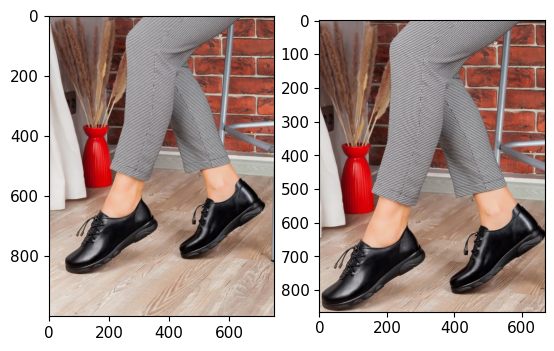

In [66]:
img_path = '/home/cemmi/Documents/aicrowd/development_test_data/gallery/ambitious-tough-teal-from-asgard.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
loc = curated_paths[img_path]

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
if loc is None:
    plt.imshow(img)
else:
    plt.imshow(img[loc[1]:loc[3], loc[0]:loc[2]])

In [11]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
%matplotlib inline

In [43]:
model = YOLO('yolov8m.pt')

  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [44]:
root = '/home/cemmi/Documents/aicrowd/development_test_data'
df = pd.read_csv('/home/cemmi/Documents/aicrowd/development_test_data/gallery.csv')
file_names = list(df['img_path'])
file_path = [f'{root}/{f}' for f in file_names]

In [45]:
def get_bbox(result):
    boxes = result[0].boxes.xyxy.detach().cpu().numpy().astype(int) 
    # get the largest box
    loc = None
    size = 0
    for box in boxes:
        w = box[2] - box[0]
        h = box[3] - box[1]
        if w*h > size:
            size = w*h
            loc = box
    return loc

bbox = {}
for f in file_path:
    result = model.predict(f)
    loc = get_bbox(result)
    bbox[f] = loc

Ultralytics YOLOv8.0.48 🚀 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/ambitious-tough-teal-from-asgard.jpg: 640x480 1 person, 1 potted plant, 1 vase, 11.1ms
Speed: 0.3ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/fine-shrewd-oarfish-of-genius.jpg: 640x512 (no detections), 11.0ms
Speed: 0.3ms preprocess, 11.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/bold-nickel-gecko-of-reputation.jpg: 640x640 (no detections), 8.5ms
Speed: 0.4ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/marvellous-uber-boo


image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/zealous-prophetic-manatee-from-arcadia.jpg: 640x640 1 person, 1 tie, 1 donut, 7.3ms
Speed: 0.3ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/complex-zealous-reindeer-of-fantasy.jpg: 640x224 1 baseball bat, 11.6ms
Speed: 0.1ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/stylish-dynamic-basilisk-of-grandeur.jpg: 640x448 1 kite, 7.7ms
Speed: 0.2ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/delicate-steel-lizard-of-painting.jpg: 544x640 1 parking meter, 1 frisbee, 11.1ms
Speed: 0.3ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Docum

Speed: 0.2ms preprocess, 8.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/cautious-adamant-termite-of-diversity.jpg: 640x480 1 scissors, 8.2ms
Speed: 0.3ms preprocess, 8.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/discreet-strict-reindeer-of-domination.jpg: 288x640 (no detections), 11.9ms
Speed: 0.2ms preprocess, 11.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hypersonic-speedy-nyala-of-judgment.jpg: 640x448 1 surfboard, 8.4ms
Speed: 0.3ms preprocess, 8.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/optimal-russet-clam-of-atheism.jpg: 640x480 1 knife, 8.5ms
Speed: 0.3ms preprocess, 8.5ms inference, 0.8ms postprocess

Speed: 0.3ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/discreet-opalescent-bee-of-acceptance.jpg: 640x640 2 scissorss, 7.5ms
Speed: 0.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/observant-pronghorn-of-major-realization.jpg: 352x640 (no detections), 7.9ms
Speed: 0.2ms preprocess, 7.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tireless-hungry-nightingale-of-pizza.jpg: 640x512 (no detections), 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/quiet-fragrant-mussel-of-anger.jpg: 640x480 1 suitcase, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.9ms po


image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/steady-manipulative-oxpecker-of-painting.jpg: 640x640 (no detections), 8.2ms
Speed: 0.3ms preprocess, 8.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/divergent-bipedal-marten-from-venus.jpg: 640x480 (no detections), 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/adorable-pygmy-poodle-of-variation.jpg: 640x640 1 snowboard, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/devious-agouti-of-exotic-pleasure.jpg: 640x512 1 cup, 1 apple, 1 orange, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicr

Speed: 0.3ms preprocess, 7.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/brilliant-exotic-sloth-of-correction.jpg: 640x320 1 surfboard, 7.4ms
Speed: 0.2ms preprocess, 7.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/radical-warping-dugong-of-sympathy.jpg: 640x640 (no detections), 8.5ms
Speed: 0.3ms preprocess, 8.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/funky-sepia-pudu-of-emphasis.jpg: 640x544 (no detections), 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/magnificent-cheerful-labrador-of-bliss.jpg: 640x640 (no detections), 8.2ms
Speed: 0.4ms preprocess, 8.2ms inference, 0.3ms post


image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/nebulous-precious-pigeon-from-venus.jpg: 448x640 1 scissors, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/crouching-eager-ibis-of-security.jpg: 640x512 1 airplane, 1 sink, 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/precise-silent-cuckoo-of-speed.jpg: 640x480 1 tennis racket, 8.0ms
Speed: 0.3ms preprocess, 8.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/impetuous-pristine-panther-of-cubism.jpg: 640x512 1 person, 1 book, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development

Speed: 0.2ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/opalescent-polite-dingo-of-downpour.jpg: 640x640 1 scissors, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/optimal-just-pogona-of-agreement.jpg: 640x640 1 scissors, 8.6ms
Speed: 0.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/phenomenal-illegal-impala-of-imagination.jpg: 640x544 1 person, 2 chairs, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/wondrous-kickass-millipede-of-abundance.jpg: 320x640 (no detections), 7.8ms
Speed: 0.2ms preprocess, 7.8ms inference, 0.3

Speed: 0.3ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/rose-bird-of-majestic-purring.jpg: 640x512 (no detections), 8.2ms
Speed: 0.3ms preprocess, 8.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/cautious-ludicrous-pig-of-poetry.jpg: 640x640 1 cake, 8.0ms
Speed: 0.3ms preprocess, 8.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/little-poetic-tuna-of-support.jpg: 640x640 (no detections), 7.4ms
Speed: 0.3ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/benevolent-strict-elephant-of-excellence.jpg: 640x640 (no detections), 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 0.4ms postprocess per

Speed: 0.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hairy-glittering-lemur-of-tempering.jpg: 448x640 1 toothbrush, 7.7ms
Speed: 0.2ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/expert-fine-asp-of-love.jpg: 640x640 1 scissors, 8.0ms
Speed: 0.3ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/gentle-ebony-cobra-of-pluck.jpg: 640x640 2 mouses, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/delectable-pistachio-peccary-of-authority.jpg: 640x640 1 snowboard, 1 surfboard, 8.4ms
Speed: 0.4ms preprocess, 8.4ms inference, 1.4ms postprocess per 

Speed: 0.2ms preprocess, 7.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/nippy-tacky-goshawk-of-upgrade.jpg: 640x480 1 scissors, 7.5ms
Speed: 0.3ms preprocess, 7.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/crystal-garrulous-badger-of-swiftness.jpg: 640x480 1 knife, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/real-eccentric-jackrabbit-of-bliss.jpg: 640x512 1 scissors, 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/romantic-certain-rattlesnake-of-pleasure.jpg: 480x640 1 toaster, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per ima

Speed: 0.3ms preprocess, 8.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/functional-mega-cricket-of-progress.jpg: 640x544 (no detections), 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/funky-hissing-heron-of-coffee.jpg: 640x448 2 persons, 1 cell phone, 8.0ms
Speed: 0.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hopeful-aquamarine-shark-of-research.jpg: 640x480 1 scissors, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/fierce-stimulating-centipede-of-proficiency.jpg: 640x640 (no detections), 8.2ms
Speed: 0.3ms preprocess, 8.2ms inferen

Speed: 0.3ms preprocess, 8.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/solid-groovy-buffalo-of-spirit.jpg: 640x448 1 person, 8.3ms
Speed: 0.3ms preprocess, 8.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/elated-incredible-taipan-from-ganymede.jpg: 640x640 1 scissors, 8.1ms
Speed: 0.3ms preprocess, 8.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tall-versatile-earwig-of-psychology.jpg: 640x480 2 mouses, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/enormous-daring-rooster-of-intensity.jpg: 640x448 (no detections), 8.6ms
Speed: 0.2ms preprocess, 8.6ms inference, 0.5ms postprocess per 

Speed: 0.3ms preprocess, 7.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/excellent-eggplant-kittiwake-of-justice.jpg: 640x544 1 stop sign, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/fiery-amber-potoo-of-ampleness.jpg: 640x448 1 scissors, 7.9ms
Speed: 0.2ms preprocess, 7.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tiny-unnatural-quokka-of-poetry.jpg: 640x480 1 scissors, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hidden-raptor-of-major-glee.jpg: 640x480 (no detections), 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.3ms postprocess per image a

Speed: 0.3ms preprocess, 7.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/optimal-astonishing-cockle-of-engineering.jpg: 640x512 1 knife, 1 scissors, 8.2ms
Speed: 0.4ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/augmented-loud-barracuda-of-faith.jpg: 640x480 (no detections), 8.6ms
Speed: 0.3ms preprocess, 8.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tremendous-famous-frigatebird-of-recreation.jpg: 640x640 (no detections), 8.0ms
Speed: 0.3ms preprocess, 8.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tough-judicious-armadillo-of-bliss.jpg: 640x480 1 mouse, 8.4ms
Speed: 0.3ms preprocess, 8.4ms infere

Speed: 0.3ms preprocess, 7.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/neon-sincere-bloodhound-of-youth.jpg: 640x640 1 person, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/portable-loose-butterfly-of-resistance.jpg: 640x416 1 handbag, 11.0ms
Speed: 0.3ms preprocess, 11.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/spiked-practical-termite-of-pleasure.jpg: 640x480 1 airplane, 1 scissors, 8.2ms
Speed: 0.3ms preprocess, 8.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/interesting-brass-rattlesnake-of-excellence.jpg: 640x480 1 person, 7.7ms
Speed: 0.4ms preprocess, 7.7ms inference, 0.9m

Speed: 0.3ms preprocess, 7.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hilarious-woodoo-markhor-from-pluto.jpg: 640x480 (no detections), 8.6ms
Speed: 0.3ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/screeching-industrious-aardwark-of-examination.jpg: 640x480 1 person, 1 fire hydrant, 7.3ms
Speed: 0.3ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tireless-mini-butterfly-of-love.jpg: 640x512 1 scissors, 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/deft-enlightened-goldfish-of-opposition.jpg: 480x640 1 scissors, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inf

Speed: 0.3ms preprocess, 9.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/logical-didactic-skylark-from-hyperborea.jpg: 608x640 1 cup, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/astute-convivial-honeybee-of-glee.jpg: 640x480 1 bench, 1 suitcase, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/pompous-enthusiastic-dolphin-of-hail.jpg: 640x384 1 person, 8.0ms
Speed: 0.3ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/omniscient-malamute-of-amusing-wealth.jpg: 640x640 1 mouse, 8.3ms
Speed: 0.3ms preprocess, 8.3ms inference, 1.3ms postprocess

Speed: 0.3ms preprocess, 7.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/lyrical-puzzling-dingo-from-sirius.jpg: 640x640 (no detections), 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/just-translucent-wolf-of-glamour.jpg: 640x640 (no detections), 7.5ms
Speed: 0.3ms preprocess, 7.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/whimsical-ostrich-of-extreme-shopping.jpg: 640x480 (no detections), 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/delightful-gray-stork-of-merriment.jpg: 352x640 1 suitcase, 7.5ms
Speed: 0.2ms preprocess, 7.5ms inference, 0.8ms post

Speed: 0.3ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/splendid-rebel-hog-of-elevation.jpg: 640x480 (no detections), 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/infrared-baboon-of-imminent-tornado.jpg: 640x640 1 clock, 8.2ms
Speed: 0.3ms preprocess, 8.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hospitable-delectable-buffalo-of-refinement.jpg: 640x640 (no detections), 7.3ms
Speed: 0.4ms preprocess, 7.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/victorious-paper-skylark-of-pride.jpg: 640x640 1 knife, 1 scissors, 7.7ms
Speed: 0.4ms preprocess, 7.7ms inference, 0.9m

Speed: 0.2ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/incredible-strange-cormorant-of-wind.jpg: 640x512 (no detections), 8.9ms
Speed: 0.3ms preprocess, 8.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/light-fluorescent-prawn-of-anger.jpg: 640x480 1 person, 1 bench, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/talented-friendly-ocelot-of-glee.jpg: 640x640 1 spoon, 1 toothbrush, 8.5ms
Speed: 0.3ms preprocess, 8.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hilarious-lush-macaque-of-triumph.jpg: 640x512 1 person, 7.5ms
Speed: 0.3ms preprocess, 7.5ms inference, 0.8ms po


image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/debonair-shellfish-of-stimulating-sympathy.jpg: 352x640 1 handbag, 1 suitcase, 7.7ms
Speed: 0.2ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/versed-authentic-koala-of-cleaning.jpg: 640x640 1 airplane, 8.7ms
Speed: 0.3ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/wealthy-falcon-of-interesting-beauty.jpg: 640x640 (no detections), 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/unselfish-soft-wildebeest-of-pleasure.jpg: 640x640 1 tennis racket, 8.2ms
Speed: 0.3ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/a

Speed: 0.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/deft-discreet-lionfish-of-climate.jpg: 640x640 1 person, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/jumping-flat-vole-from-wonderland.jpg: 480x640 1 vase, 1 scissors, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tactful-exotic-lizard-from-camelot.jpg: 640x480 1 handbag, 1 book, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/intrepid-shrew-of-unreal-lightning.jpg: 640x480 1 surfboard, 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 1.0ms postproc

Speed: 0.3ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/calculating-crouching-ammonite-of-foundation.jpg: 640x640 (no detections), 7.8ms
Speed: 0.2ms preprocess, 7.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/hypersonic-flawless-ibis-from-ganymede.jpg: 640x640 (no detections), 7.5ms
Speed: 0.3ms preprocess, 7.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/tangible-mayfly-of-impossible-love.jpg: 320x640 1 knife, 9.7ms
Speed: 0.4ms preprocess, 9.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/rugged-talented-chinchilla-of-correction.jpg: 640x640 (no detections), 7.9ms
Speed: 0.3ms preprocess, 7.9ms infer

Speed: 0.3ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/augmented-delightful-capuchin-of-infinity.jpg: 640x640 1 scissors, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/innocent-perfect-bear-of-camouflage.jpg: 480x640 1 scissors, 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/rousing-alluring-gerbil-of-vigor.jpg: 640x448 (no detections), 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/resolute-macho-bee-of-improvement.jpg: 640x480 1 airplane, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 1.1ms postproces

Speed: 0.3ms preprocess, 7.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/ruddy-muscular-peccary-from-jupiter.jpg: 640x480 1 person, 8.0ms
Speed: 0.3ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/refined-omniscient-manatee-of-promise.jpg: 640x512 1 person, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/competent-tough-smilodon-of-progress.jpg: 640x640 1 scissors, 7.7ms
Speed: 0.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/gay-golden-caiman-of-recreation.jpg: 640x480 1 cup, 1 dining table, 1 vase, 1 scissors, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inferen

Speed: 0.3ms preprocess, 8.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/statuesque-mahogany-herring-from-tartarus.jpg: 640x480 (no detections), 7.6ms
Speed: 0.2ms preprocess, 7.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/talented-jasper-axolotl-of-tornado.jpg: 640x640 (no detections), 7.5ms
Speed: 0.3ms preprocess, 7.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/benevolent-loud-giraffe-of-education.jpg: 640x640 (no detections), 7.4ms
Speed: 0.3ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/stalwart-husky-of-unusual-tenacity.jpg: 640x448 1 bottle, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.8m

Speed: 0.3ms preprocess, 7.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/jasmine-bull-of-amazing-aptitude.jpg: 640x480 (no detections), 7.4ms
Speed: 0.3ms preprocess, 7.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/kind-tacky-panda-of-cleaning.jpg: 640x448 (no detections), 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/exuberant-jade-turtle-of-thunder.jpg: 640x512 (no detections), 8.3ms
Speed: 0.3ms preprocess, 8.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/astonishing-precise-flounder-of-justice.jpg: 640x640 1 knife, 8.8ms
Speed: 0.4ms preprocess, 8.8ms inference, 0.8ms postprocess p

Speed: 0.5ms preprocess, 9.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/fascinating-ultra-lion-of-attack.jpg: 640x480 (no detections), 7.9ms
Speed: 0.2ms preprocess, 7.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/spectral-witty-earwig-of-anger.jpg: 640x480 (no detections), 7.6ms
Speed: 0.2ms preprocess, 7.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/stalwart-convivial-foxhound-of-serenity.jpg: 640x480 1 person, 1 scissors, 7.5ms
Speed: 0.3ms preprocess, 7.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/outrageous-innocent-pheasant-of-effort.jpg: 608x640 (no detections), 8.4ms
Speed: 0.3ms preprocess, 8.4ms inference

Speed: 0.3ms preprocess, 8.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/manipulative-attractive-bee-of-control.jpg: 640x480 1 vase, 7.9ms
Speed: 0.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/courageous-tody-of-strongest-action.jpg: 640x480 (no detections), 7.6ms
Speed: 0.3ms preprocess, 7.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/perfect-mule-of-fortunate-improvement.jpg: 640x512 1 person, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/massive-hot-bettong-of-cleaning.jpg: 640x512 1 kite, 8.5ms
Speed: 0.4ms preprocess, 8.5ms inference, 1.0ms postprocess per imag

Speed: 0.3ms preprocess, 7.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/stirring-arrogant-cockatoo-from-valhalla.jpg: 640x640 1 handbag, 1 tennis racket, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/invisible-almond-cat-of-novelty.jpg: 640x480 1 person, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/spiked-tough-jackal-of-fragrance.jpg: 416x640 1 cup, 1 scissors, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/cemmi/Documents/aicrowd/development_test_data/gallery/beautiful-gray-bandicoot.jpg: 640x480 1 cup, 7.7ms
Speed: 0.3ms preprocess, 7.7ms inference, 0.8ms postprocess p

In [54]:
img_path = '/home/cemmi/Documents/aicrowd/development_test_data/gallery/accelerated-merciful-mongrel-of-exercise.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
loc = bbox[img_path]

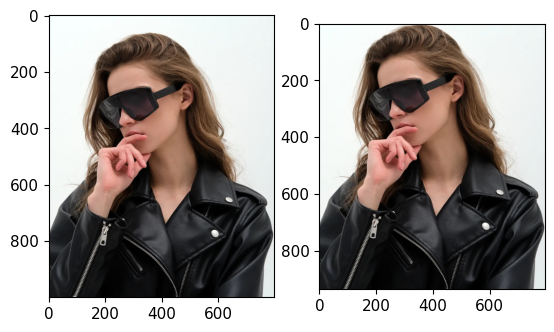

In [55]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
if loc is None:
    plt.imshow(img)
else:
    plt.imshow(img[loc[1]:loc[3], loc[0]:loc[2]])